<a href="https://colab.research.google.com/github/LuisFilipeAraujo/Luis_WorCAP-2021.ipynb/blob/main/WorCAP_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TREINAMENTO DA REDE CONVOLUCIONAL**

## **INSTALAÇÃO DA DARKNET:**

Configuração da Darknet para uso dos recursos CUDA e OpenCV e instalação.

(Tende a demorar menos de um minuto)

In [56]:
# Baixa o repositório da Darknet:
!git clone https://github.com/AlexeyAB/darknet

# Configura o MAKEFILE para o uso do CUDA (DEPENDE DE GPGPU):
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

# Verifica o CUDA:
!/usr/local/cuda/bin/nvcc --version

# Instala a Darknet:
!make

Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Total 15502 (delta 0), reused 0 (delta 0), pack-reused 15502
Receiving objects: 100% (15502/15502), 14.16 MiB | 7.79 MiB/s, done.
Resolving deltas: 100% (10405/10405), done.
Checking out files: 100% (2057/2057), done.
/content/drive/MyDrive/WorCAP2021/darknet
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In f

In [58]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## **TREINAMENTO DA REDE CONVOLUCIONAL YOLO:**

Acessa o ambiente de treinamento no Drive (que deve estar montado) e inicia a Darknet em modo de treinamento. O comando é o mesmo independente se será treinada a rede YOLOv4 Full ou YOLOv4 Tiny.

**Nota:** Isso pode demorar dentre horas a semanas, dependendo da rede e dos dados a serem consumidos. O código deve retomar o treinamento do ponto anterior à última interrupção.

In [60]:
# Acessa o ambiente:
%cd "/content/drive/MyDrive/WorCAP2021"

# Realiza o treinamento (comandos relativos ao ambiente):
! ./../../../darknet/darknet detector train data/directives.data model.cfg models/model_last.weights -dont_show -map

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-60-f116952cbb80>", line 2, in <module>
    get_ipython().run_line_magic('cd', '"/content/drive/MyDrive/WorCAP2021"')
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2314, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magics/osm.py", line 334, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/intera

OSError: ignored

**PARA EVITAR SER DESCONECTADO POR INATIVIDADE, INSIRA ESSE COMANDO NO CONSOLE DO NAVEGADOR (`Ctrl+Shift+I`):**

```

function ClickConnect(){
console.log("Working");
document
.querySelector('#top-toolbar > colab-connect-button')
.shadowRoot.querySelector('#connect')
.click()
}
setInterval(ClickConnect,60000);

function ClickConnect(){
console.log("Working");
document
.querySelector('#top-toolbar > colab-connect-button')
.shadowRoot.querySelector('#connect')
.click()
}
setInterval(ClickConnect,60000)

```

---
# **ATIVAÇÃO DA REDE**


**NECESSÁRIO PARA TODOS OS TIPOS DE ATIVAÇÃO:**

In [61]:
# Instala uma versão do OpenCV compatível com a Darknet:
!pip install opencv-python==4.5.3.56

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
The folder you are executing pip from can no longer be found.


In [62]:
# Importa as bibliotecas utilizadas para a ativação:
from os import listdir
from cv2 import imread, imwrite, VideoWriter, VideoWriter_fourcc, VideoCapture, CAP_PROP_FPS, dnn, FONT_HERSHEY_PLAIN, rectangle, putText
from google.colab.patches import cv2_imshow as imshow
from numpy import argmax


# Define o caminho para o ambiente de ativação no Drive:
path = "/content/drive/MyDrive/WorCAP2021/activation/"

# Carrega a rede convolucional (arquitetura e pesos):
net = dnn.readNet(path + "networks/model.cfg", path + "networks/model.weights")

# Carrega as classes discrimináveis:
classes = []
with open(path + "networks/model.names", 'r') as f:
    classes = f.read().splitlines()

## **ATIVAÇÃO EM UMA ÚNICA IMAGEM:**

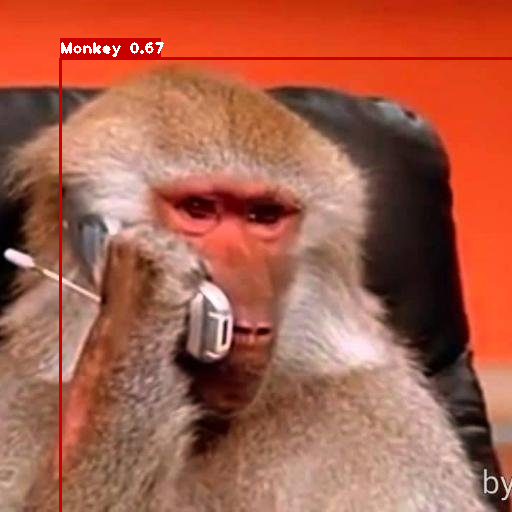

In [63]:
# Carrega a imagem:
img = imread(path + "input.jpg")

# Define variáveis de execução, ponteiros e afins:
height, width, _ = img.shape

net.setInput(dnn.blobFromImage(img, (1 / 255), (415, 416), (0, 0, 0), swapRB=True, crop=False))
boxes = []
confidences = []
class_ids = []

# Detecção e armazenamento das instâncias de objetos:
for output in net.forward(net.getUnconnectedOutLayersNames()):
    for detection in output:
        scores = detection[5:]
        class_id = argmax(scores)
        confidence = scores[class_id]
        if (confidence > 0.5):
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - (w / 2))
            y = int(center_y - (h / 2))
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Renderização no quadro dos delimitadores, classe e índice de confiança de cada instância detectada:
indexes = dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
if (len(indexes) > 0):
    for i in indexes.flatten():
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = str(round(confidences[i], 2))
        rectangle(img, (x, y), ((x + w), (y + h)), (0, 0, 200), 2)
        rectangle(img, (x, y - 20), (x + ((len(label) + len(str(confidence))) * 10), y), (0, 0, 200), -1)
        putText(img, (label + ' ' + confidence), (x, (y - 5)), FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 2)

# Disposição e armazenamento em disco (no Drive) do quadro e conteúdo nele renderizado:
imwrite(path + "output.png", img)
imshow(img)

## **ATIVAÇÃO EM DIRETÓRIO CONTENDO VÁRIAS IMAGENS:**

In [ ]:
# Carrega a lista de imagens no diretório de ativação:
image_files = []
for filename in listdir(path + "input"):
    image_files.append(filename)

# Executa a ativação em cada imagem dentro do diretório de ativação:
for image in image_files:
    # Carrega a imagem:
    img = imread(path + "input/" + image)

    # Define variáveis de execução, ponteiros e afins:
    height, width, _ = img.shape

    net.setInput(dnn.blobFromImage(img, (1 / 255), (415, 416), (0, 0, 0), swapRB=True, crop=False))
    boxes = []
    confidences = []
    class_ids = []

    # Detecção e armazenamento das instâncias de objetos:
    for output in net.forward(net.getUnconnectedOutLayersNames()):
        for detection in output:
            scores = detection[5:]
            class_id = argmax(scores)
            confidence = scores[class_id]
            if (confidence > 0.5):
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - (w / 2))
                y = int(center_y - (h / 2))
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Renderização no quadro dos delimitadores, classe e índice de confiança de cada instância detectada:
    indexes = dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    if (len(indexes) > 0):
        for i in indexes.flatten():
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i], 2))
            rectangle(img, (x, y), ((x + w), (y + h)), (0, 0, 200), 2)
            rectangle(img, (x, y - 20), (x + ((len(label) + len(str(confidence))) * 10), y), (0, 0, 200), -1)
            putText(img, (label + ' ' + confidence), (x, (y - 5)), FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 2)

    # Armazenamento da imagem resultante em disco (no Drive):
    imwrite((path + "output/" + image), img)


## **ATIVAÇÃO EM FLUXO DE VÍDEO:**

In [ ]:
# Define ponteiros de leitura e escrita do vídeo de entrada e saída, respectivamente:
cap = VideoCapture(path + "input.mp4")
out = VideoWriter(path + 'output.mp4', VideoWriter_fourcc(*"mp4v"), 20, (int(cap.get(3)), int(cap.get(4))))

# Loop responsável pelo fluxo de vídeo:
while (1 < 2):

    # Define variáveis de execução, ponteiros e afins:
    _, img = cap.read()

    try:
        height, width, _ = img.shape
    except(AttributeError):
        break
    net.setInput(dnn.blobFromImage(img, (1 / 255), (415, 416), (0, 0, 0), swapRB=True, crop=False))
    boxes = []
    confidences = []
    class_ids = []

    # Detecção e armazenamento das instâncias de objetos:
    for output in net.forward(net.getUnconnectedOutLayersNames()):
        for detection in output:
            scores = detection[5:]
            class_id = argmax(scores)
            confidence = scores[class_id]
            if (confidence > 0.5):
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - (w / 2))
                y = int(center_y - (h / 2))
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Renderização no quadro dos delimitadores, classe e índice de confiança de cada instância detectada:
    indexes = dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    if (len(indexes) > 0):
        for i in indexes.flatten():
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i], 2))
            rectangle(img, (x, y), ((x + w), (y + h)), (0, 0, 200), 2)
            rectangle(img, (x, y - 20), (x + ((len(label) + len(str(confidence))) * 10), y), (0, 0, 200), -1)
            putText(img, (label + ' ' + confidence), (x, (y - 5)), FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 2)

    # Disposição e armazenamento do quadro no fluxo de vídeo em disco (no Drive) e conteúdo nele renderizado:
    imshow(img)
    out.write(img)

# Encerramento dos ponteiros de leitura e escrita:
cap.release()
out.release()

---
# **INTRODUÇÃO A OPENCV**

**Nota:** os seguintes experimentos não dependem da versão mais recente do OpenCV, ainda que possa ser utilizado:

In [ ]:
# Importação das bibliotecas necessárias para essa exploração:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
# Baixa a famosa imagem de teste Lena para o ambiente:
!wget "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png" -O "Lena.png"

--2022-08-26 05:14:06--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lena.png’

Lena.png            100%[===================>] 462.73K  1000KB/s    in 0.5s    

2022-08-26 05:14:07 (1000 KB/s) - ‘Lena.png’ saved [473831/473831]



## **COMEÇANDO PELO BÁSICO**

O OpenCV conta com suas próprias funções para manipuação das imagens. Um detalhe que pode ajudar a entender melhor as possibilidades do OpenCV no Python é levar em consideração de que as imagens carregadas são nada além do que matrizes Numpy (geralmente com duas ou três dimensões).

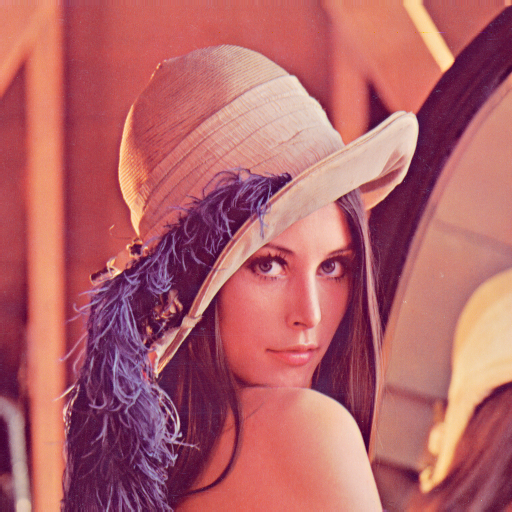

Lena - imagem de teste:
 	Altura: 512 pixels;
	Largura: 512 pixels;
	Profundidade: 3 canais;
	Total de pixels: 786432 .


In [ ]:
# Carrega a imagem:
img = cv2.imread("Lena.png")

# Apresenta a imagem:
cv2_imshow(img)

# Extrai algumas informações da image:
altura, largura, profundidade = img.shape
pixels = img.size
print("Lena - imagem de teste:\n",
      "\tAltura:", altura, "pixels;\n"
      "\tLargura:", largura, "pixels;\n"
      "\tProfundidade:", profundidade, "canais;\n"
      "\tTotal de pixels:", pixels, '.')

Um recurso simples é o redimensionamento das imagens. Embora isso possa ser feito com funções matriciais rudimentares, o OpenCV possui uma função simples para isso, que garante a melhor qualidade da imagem resultante com uma única linha de código:

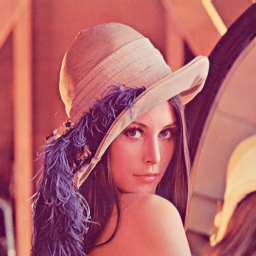

Lena - imagem redimensionada:
 	Altura: 256 pixels;
	Largura: 256 pixels;
	Profundidade: 3 canais;
 	Total de pixels:  196608 .


In [ ]:
# Redimensiona a imagem e a exibe:
redim = cv2.resize(img, (int(largura * 0.5), int(altura * 0.5)))
cv2_imshow(redim)

# Extrai algumas informações da image:
altura, largura, profundidade = redim.shape
pixels = redim.size
print("Lena - imagem redimensionada:\n",
      "\tAltura:", altura, "pixels;\n"
      "\tLargura:", largura, "pixels;\n"
      "\tProfundidade:", profundidade, "canais;\n",
      "\tTotal de pixels: ", pixels, '.')

Voltando ao fato de que as imagens são matrizes Numpy, elas podem ser manipuladas como tal. Um exemplo simples é a possibilidade de espelhá-las como podemos espelhar qualquer lista.

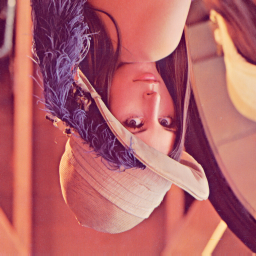

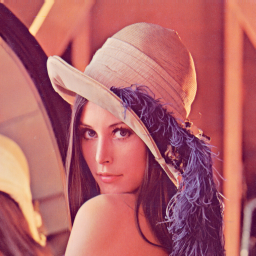

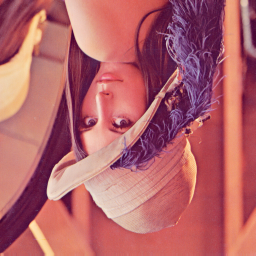

In [ ]:
# Reflete a imagem verticalmente:
reflex_vert = redim[::-1, ::]
cv2_imshow(reflex_vert)

# Reflete a imagem horizontalmente:
reflex_hor = redim[::, ::-1]
cv2_imshow(reflex_hor)

# Reflete a imagem horizontalmente e verticalmente:
reflex_duplo = redim[::-1, ::-1]
cv2_imshow(reflex_duplo)

Do mesmo modo, podemos aparar as imagens usando suas coordenadas da mesma forma que extraímos dados de endereços específicos de listas.

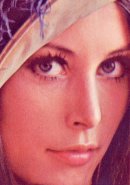

In [ ]:
# Aparagem da imagem:
aparada = img[200:385, 220:350]
cv2_imshow(aparada)

Voltando às funções do OpenCV, uma operação corriqueira simplificada pelo OpenCV é a rotação das imagens. As mais simples e livres de adversidades são as em 90°, 180° e 270°.

**Nota:** Existem funções para aplicar rotações em outros ângulos, mas elas apresentam adversidades que dependem de tratativas que podem variar diante dos objetivos do desenvolvedor.

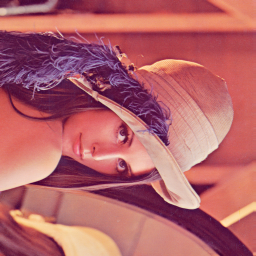

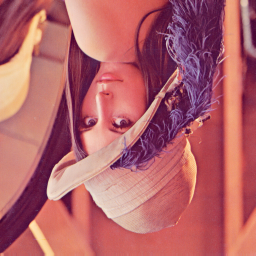

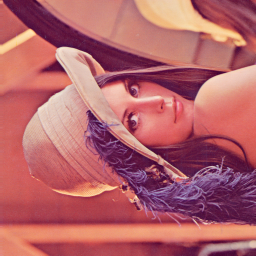

In [ ]:
# Rotaciona a imagem em 90°:
rot90 = cv2.rotate(redim, cv2.ROTATE_90_CLOCKWISE)
cv2_imshow(rot90)

# Rotaciona a imagem em 180°:
rot180 = cv2.rotate(redim, cv2.ROTATE_180)
cv2_imshow(rot180)

# Rotaciona a imagem em 270°:
rot270 = cv2.rotate(redim, cv2.ROTATE_90_COUNTERCLOCKWISE)
cv2_imshow(rot270)

Enfim, podemos armazenar qualquer imagem com a mesma simplicidade que as lemos.

In [ ]:
# Insere a imagem espelhada em um arquivo no ambiente:
cv2.imwrite("espelhada.png", reflex_hor)

True

## **MANIPULANDO E TRANSFORMANDO DADOS**

As imagens tendem a ter três dimensões, como já visto, sendo altura, largura e canais de cor.

Pode ser relevante a separação da imagem em canais de cores.

**Nota:** Diferente da organização RGB, que é mais comum, o OpenCV usa por padrão o BGR -- motivo: legado e saudosismo, pois as primeiras câmeras digitais usavam esse formato.

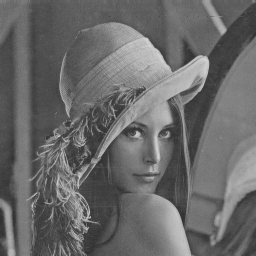

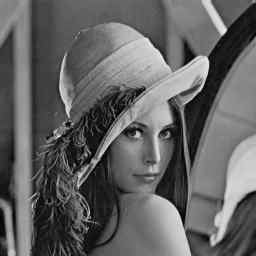

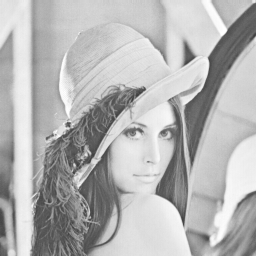

In [ ]:
# Separa os três canais da imagem (azul, verde e vermelho):
B, G, R = cv2.split(redim)

cv2_imshow(B)
cv2_imshow(G)
cv2_imshow(R)

Do mesmo modo, pode ser relevante a união dos canais, permitindo assim inclusive a troca de canais.

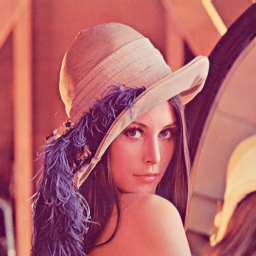

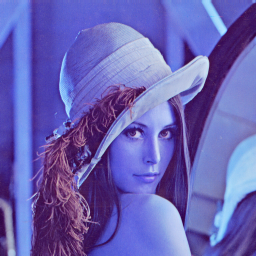

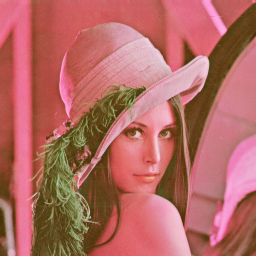

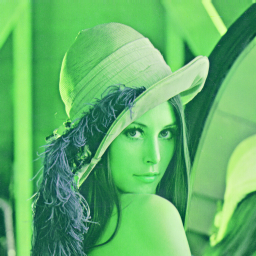

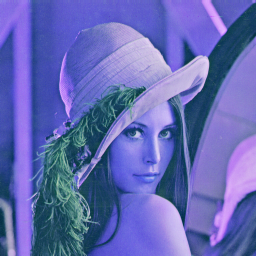

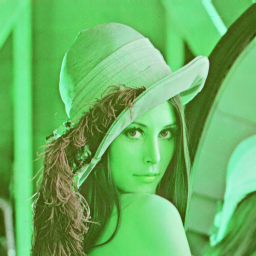

In [ ]:
# Reúne os canais em uma única imagem:
BGR = cv2.merge((B, G, R))
cv2_imshow(BGR)

# Reúne os canais em uma única imagem, experimentando diferentes ordens de canais:
RGB = cv2.merge((R, G, B))
cv2_imshow(RGB)

GBR = cv2.merge((G, B, R))
cv2_imshow(GBR)

BRG = cv2.merge((B, R, G))
cv2_imshow(BRG)

RBG = cv2.merge((R, B, G))
cv2_imshow(RBG)

GRB = cv2.merge((G, R, B))
cv2_imshow(GRB)

E para a possibilidade de se carregar uma imagem RGB para ser manipulada pelo OpenCV, já fica disponível uma função para fazer a troca da ordem dos canais de cores para evitar conflitos.

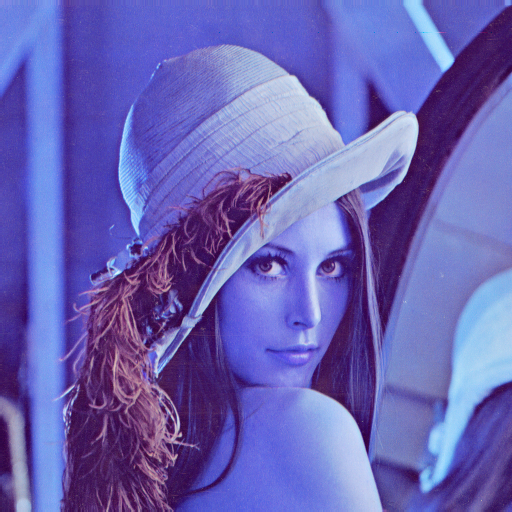

In [ ]:
# Converte BGR para RGB em uma única linha -- pode ser útil quando se importa a imagem com outro framework:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

Outra possibilidade é pegar a frequência geral dos píxels e realizar a conversão para escala de cinza. A imagem resultante, é importante notar, é de apenas um canal.

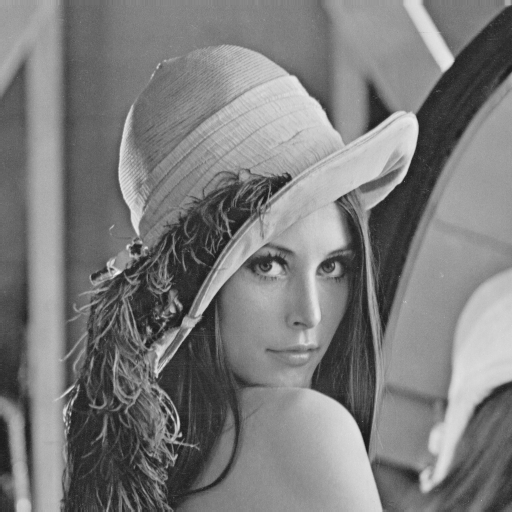

Dimensões da imagem: (512, 512)


In [ ]:
# Converte a imagem colorida para escala de cinza:
BW = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(BW)
print("Dimensões da imagem:", BW.shape)

A maioria das funções, no entanto, dependem de três canais de cores. para a necessidade de se usar essas funções em uma imagem convertida para escala de cinza, é possível distribuí-la em três canais.

**Nota:** Essa função não retorna a imagem para suas cores originais. Qualquer conversão de três canais para escala de cinza incorre na perda das cores; se for desejado manter armazenado os valores dos canais, salve uma cópia da imagem separadamente (ou, no mínimo, de seus canais).

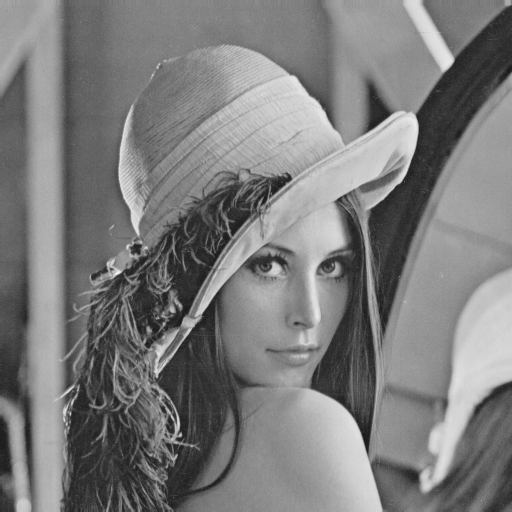

Dimensões da imagem: (512, 512, 3)


In [ ]:
# Distribui a imagem em escala de cinza para canais BGR, invariavelmente com perda de cores:
BGR_BW = cv2.cvtColor(BW, cv2.COLOR_GRAY2BGR)
cv2_imshow(BGR_BW)
print("Dimensões da imagem:", BGR_BW.shape)

O OpenCV conta com algumas funções matriciais embutidas, que permitem assim a transformação da imagem com critérios mais complexos. Pode ser útil ou divertido usá-las -- brinque um pouco com os híperparâmetros.

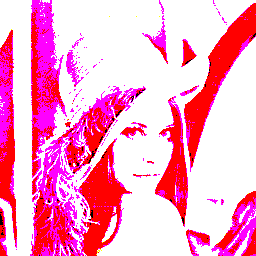

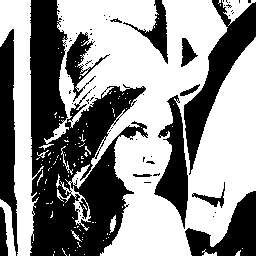

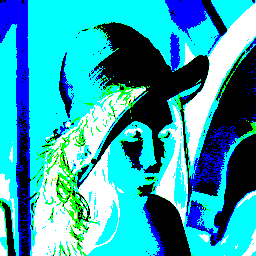

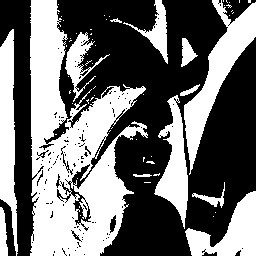

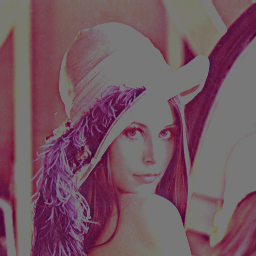

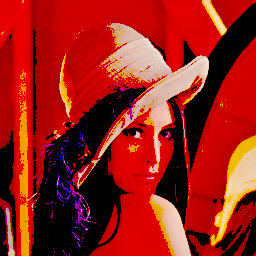

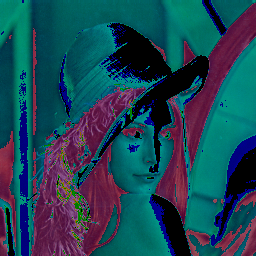

In [ ]:
# Algumas transformadas de frequências:

# Binarização colorida:
_, col_binary = cv2.threshold(redim, 75, 255, cv2.THRESH_BINARY)
cv2_imshow(col_binary)

# Preto e branco:
_, bw = cv2.threshold(cv2.cvtColor(cv2.cvtColor(redim, cv2.COLOR_BGR2GRAY), cv2.COLOR_GRAY2BGR), 120, 255, cv2.THRESH_BINARY)
cv2_imshow(bw)

# Binarização colorida invertida:
_, inv_col_binary = cv2.threshold(redim, 120, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(inv_col_binary)

# Preto e branco invertido:
_, inv_bw = cv2.threshold(cv2.cvtColor(cv2.cvtColor(redim, cv2.COLOR_BGR2GRAY), cv2.COLOR_GRAY2BGR), 120, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(inv_bw)

# Truncada:
_, trunc = cv2.threshold(redim, 120, 255, cv2.THRESH_TRUNC)
cv2_imshow(trunc)

# Limiar de minimização:
_, to_zero = cv2.threshold(redim, 150, 255, cv2.THRESH_TOZERO)
cv2_imshow(to_zero)

# Limiar de minimização invertido:
_, inv_to_zero = cv2.threshold(redim, 150, 255, cv2.THRESH_TOZERO_INV)
cv2_imshow(inv_to_zero)

Volta-e-meia, a detecção de bordas em imagens é necessaria. O OpenCV também conta com algoritmos para tal extração, como o algoritmo Canny.

Existem ainda possibilidades mais complexas para extração de bordas.

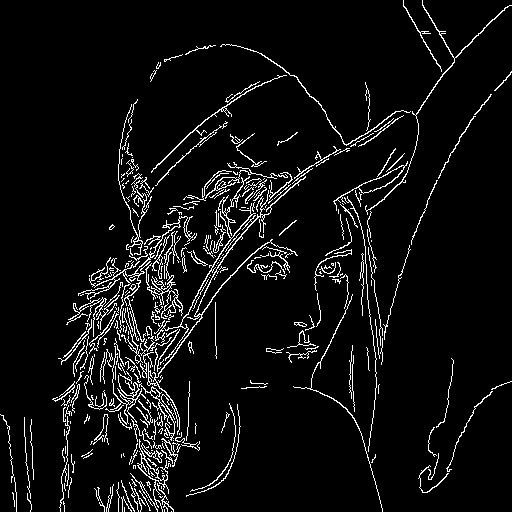

In [ ]:
# Extração de bordas pelo algoritmo Canny:
canny = cv2.Canny(img, 120, 255, 3)
cv2_imshow(canny)

Aproveitando que podemos extrair as bordas, fica abaixo um exemplo de operação lógica com os dados, simplificado com funções do OpenCV. Na operação abaixo, os pixels onde há bordas detectadas são realçadas na imagem original, tendo seus valores de união convertidos para branco.

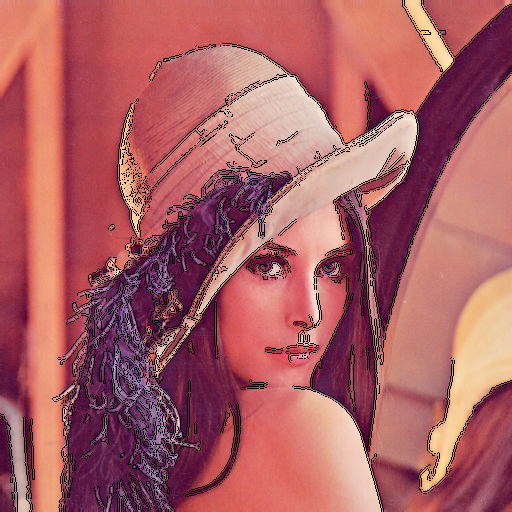

In [ ]:
# Sobreposição de imagens (realce das bordas sobre a imagem):
mask = cv2.bitwise_not(cv2.Canny(canny, 120, 255, 3))
realce = cv2.bitwise_and(img, img, mask=mask)
cv2_imshow(realce)

## **COMPUTAÇÃO GRÁFICA**

O OpenCV também funciona muito bem para computação gráfica. 

Comecemos usando o princípio matricial das imagens para criar um canvas com 480 de altura e 720 de altura, com três canais de cores. A matriz e preenchida com zeros, o que o OpenCV interpreta com o preto.

In [ ]:
# Gera uma imagem preta com 720 de largura e 480 de altura:
canvas = np.zeros([480, 720, 3])
cv2_imshow(canvas)

Ainda seguindo esse princípio matricial, podemos alterar as cores dos píxels presentes no canvas através de suas coordenadas. Essas cores, por suas vezes, são referentes aos valores presentes nas coordenadas, sendo assim listas com três endereços: azul, verde e vermelhor (BGR), respectivamente.

O OpenCV segue coordenadas de um quarto quadrante cartesiano, o que significa que seu ponto mínimo é o ponto superior esquerdo, enquanto o ponto máximo é o ponto inferior direito: o eixo X "cresce" para direita enquanto o eixo Y "cresce" para baixo.

In [ ]:
# Cria outro canvas, tal como o anterior:
canvas1 = np.zeros([480, 720, 3])

# Colore o alguns pontos do canvas baseado em coordenadas:
canvas1[10:20, 10:20] = [255, 0, 0]       # AZUL
canvas1[460:470, 10:20] = [255, 255, 255] # BRANCO
canvas1[10:20, 700:710] = [0, 0, 255]     # VERMELHO
canvas1[460:470, 700:710] = [0, 255, 0]   # VERDE
canvas1[240, 360] = [20, 150, 255]        # LARANJA

cv2_imshow(canvas1)

Não é necessário, no entanto, ir selecionando píxel por píxel das formas mais inventivas possíveis para se preencher as imagens com informações mais complexas, pois o OpenCV conta com algumas funções de computação gráfica embutidas.

Uma dessas funções nos permite criar linhas retas a partir de duas coordenadas, sendo respectivamente o ponto mínimo e máximo das retas.

In [ ]:
# Cria outro canvas:
canvas2 = np.zeros([480, 720, 3])

# Insere várias linhas retas no mesmo canvas, com diferentes coordenadas de ponto incial e final, cores e espessuras:
cv2.line(canvas2, (10, 10), (10, 470), (255, 0, 0), 1)        # AZUL
cv2.line(canvas2, (10, 10), (710, 470), (255, 255, 255), 2)   # BRANCA
cv2.line(canvas2, (10, 10), (710, 10), (0, 255, 0), 4)        # VERDE
cv2.line(canvas2, (10, 470), (710, 10), (0, 0, 255), 3)       # VERMELHO

cv2_imshow(canvas2)

Prosseguindo, não é necessário programar quatro linhas para se desenhar uma caixa, pois há uma função para isso também: tão simples quanto se desenhar uma linha, é possível desenhar um retângulo com um ponto mínimo e máximo. É possível inclusive fazê-los preenchidos.

In [ ]:
# Cria ainda um outro canvas:
canvas3 = np.zeros([480, 720, 3])

# Insere vários retângulos no mesmo canvas, com diferentes coordenadas de ponto máximo e mínimo, cores e espessuras:
cv2.rectangle(canvas3, (44, 72), (20, 400), (255, 0, 0), 1)        # AZUL
cv2.rectangle(canvas3, (50, 30), (700, 370), (255, 255, 255), 2)   # BRANCO
cv2.rectangle(canvas3, (110, 103), (510, 210), (0, 255, 0), 4)     # VERDE
cv2.rectangle(canvas3, (10, 470), (710, 10), (0, 0, 255), 3)       # VERMELHO
cv2.rectangle(canvas3, (290, 260), (220, 60), (255, 0, 255), -1)   # ROSA

cv2_imshow(canvas3)

Outra possibilidade é a formação de círculos, levando em consideração seus respectivos epicentros e raios.

In [ ]:
# Cria ainda um outro canvas:
canvas4 = np.zeros([480, 720, 3])

# Insere vários círculos no mesmo canvas, com diferentes coordenadas de epicentro, raios, cores e espessuras:
cv2.circle(canvas4, (44, 72), 20, (255, 0, 0), 1)        # AZUL
cv2.circle(canvas4, (550, 300), 40, (255, 255, 255), 2)  # BRANCO
cv2.circle(canvas4, (110, 103), 210, (0, 255, 0), 4)     # VERDE
cv2.circle(canvas4, (140, 400), 70, (0, 0, 255), 3)      # VERMELHO
cv2.circle(canvas4, (330, 200), 85, (255, 0, 255), -1)   # ROSA

cv2_imshow(canvas4)

O OpenCV também conta com a possibilidade de formar demais linhas curvas que não são necessariamente circulos fechados. Há uma função para se desenhar elípses diversas.

**Nota:** Essas elípses são formadas a partir de seus epicentros e não por pontos máximos e mínimos.

In [ ]:
# Cria mais um novo canvas:
canvas5 = np.zeros([480, 720, 3])

# Insere várias curvas elípses no mesmo canvas, com diferentes coordenadas de epicentro, raios, cortes, preenchimentos, cores e espessuras:
cv2.ellipse(canvas5, (44, 72), (20, 20), 10, 0, 360, (255, 0, 0), 1)         # AZUL
cv2.ellipse(canvas5, (550, 300), (40, 15), 10, 90, 360, (255, 255, 255), 2)  # BRANCA
cv2.ellipse(canvas5, (110, 103), (210, 300), 10, 90, 45, (0, 255, 0), 4)     # VERDE
cv2.ellipse(canvas5, (140, 400), (70, 200), 10, 180, 360, (0, 0, 255), 3)    # VERMELHO
cv2.ellipse(canvas5, (330, 200), (85, 10), 10, 270, 360, (255, 0, 255), -1)  # ROSA

cv2_imshow(canvas5)

Mas não precisamos nos prender apenas a linhas retas, curvas, retângulos e círculos. Podemos também carregar uma lista de coordenadas ordenadas que dizem respeito às vétices dos polígonos e usar uma função que desenha suas arestas, podendo ser apenas segmentos de linhas ou polígonos fechados.

In [ ]:
# Cria mais um canvas:
canvas6 = np.zeros([480, 720, 3])

# Gera uma lista de coordenadas:
coords1 = [(500, 150), (475, 120), (25, 200), (351, 457)]
coords2 = [(300, 150), (275, 120), (225, 200), (451, 457)]
coords3 = [(400, 150), (375, 120), (125, 200), (251, 457)]
coords4 = [(600, 150), (575, 120), (325, 200), (451, 457)]

# Insere retas que seguem as coordenadas acima, podendo ser fechadas ou abertas, e em diferentes cores e espessuras:
cv2.polylines(canvas6, np.array([coords1]), False, (0, 255, 0), 3)    # VERDE
cv2.polylines(canvas6, np.array([coords2]), True, (0, 255, 255), 0)   # AMARELO
cv2.polylines(canvas6, np.array([coords3]), True, (255, 255, 255), 2) # BRANCO
cv2.polylines(canvas6, np.array([coords4]), False, (255, 255, 0), 2)  # CIANO

cv2_imshow(canvas6)

Um detalhe muito útil dessa função é que o desenvolvedor não precisa necessáriamente inserir coordenada por coordenada na lista. É muito bem possível se programar funções lineares para se obter as coordenadas, deixando todo o trabalho sujo e demorado para o Python.

In [ ]:
# Gera quatro funções arbitrárias:
coords1 = []
coords2 = []
coords3 = []
coords4 = []
for x in range(730):
  coords1.append((x * 10, int(np.sin(x*3) * 100) + 100))
  coords2.append((x * 10, int(np.sin(x*4) * 100) + 200))
  coords3.append((x * 10, int(np.sin(x*5) * 100) + 300))
  coords4.append((x * 10, int(np.sin(x*6) * 100) + 400))

# Cria mais um canvas:
canvas7 = np.zeros([480, 720, 3])

# Insere no canvas as quatro funções geradas acima:
cv2.polylines(canvas7, np.array([coords1]), False, (255, 255, 0), 2)    # CIANO
cv2.polylines(canvas7, np.array([coords2]), False, (0, 255, 0), 2)      # VERDE
cv2.polylines(canvas7, np.array([coords3]), False, (255, 255, 255), 2)  # BRANCO
cv2.polylines(canvas7, np.array([coords4]), False, (0, 255, 255), 2)    # AMARELO

cv2_imshow(canvas7)

Por último, porém não menos importante, o OpenCV também conta com uma função para escrita de textos, com fontes diversas.

**Nota:** O OpenCV não compreende caracteres especiais e estrangeiros.

In [ ]:
# Cria o último canvas:
canvas8 = np.zeros([480, 720, 3])

# Insere diversos textosno mesmo canvas, com diferentes palavras, coordenadas de parágrafo, fontes, tamanhos, cores e espessuras:
cv2.putText(canvas8, ("Sample text"), (44, 72), cv2.FONT_HERSHEY_COMPLEX, 3, (255, 0, 0), 1)                          # AZUL
cv2.putText(canvas8, ("Texto de exemplo"), (250, 300), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 2, (255, 255, 255), 2)        # BRANCO
cv2.putText(canvas8, ("Acho que deu pra entender"),(110, 103), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 255, 0), 4)            # VERDE
cv2.putText(canvas8, ("Limitação"), (140, 400), cv2.FONT_HERSHEY_PLAIN, 3, (0, 255, 255), 3)                          # AMARELO
cv2.putText(canvas8, ("Оно этого не буду понимать"), (80, 200), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 1)    # VERMELHO

cv2_imshow(canvas8)